## Figure 2: Timeseries Plots / Analysis Notebook (JATA v4, N=24)

*Last update: 2021-11-16*


In [1]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import importlib

from trial import Trial
from util import dist
from constants import COND_LABELS, FS, COUNTER_LABELS
import plots
import pyreadstat
import analysis_helper

importlib.reload(plots)
importlib.reload(analysis_helper)

plt.style.use('./jg.mplstyle')

### Load data and prepare output directory

In [2]:
df_trials = pd.read_pickle('../data/df_trials_v4.pickle')

### Drop dyads with incomplete trial counts

In [3]:
DROP_IDS = []
for p0 in df_trials.p0.unique():
    n = len(df_trials[df_trials.p0 == p0])
    if n < 82:
        print("%s incomplete, %d trials" % (p0, n))

KvUtiE8YJZbFWmE2qCW8ASYWYJk1 incomplete, 81 trials


In [4]:
for mid in DROP_IDS:
    df_trials = df_trials.drop(df_trials[df_trials.match_id == mid].index)

# Drop practice
df_trials = df_trials[df_trials.practice == 0]

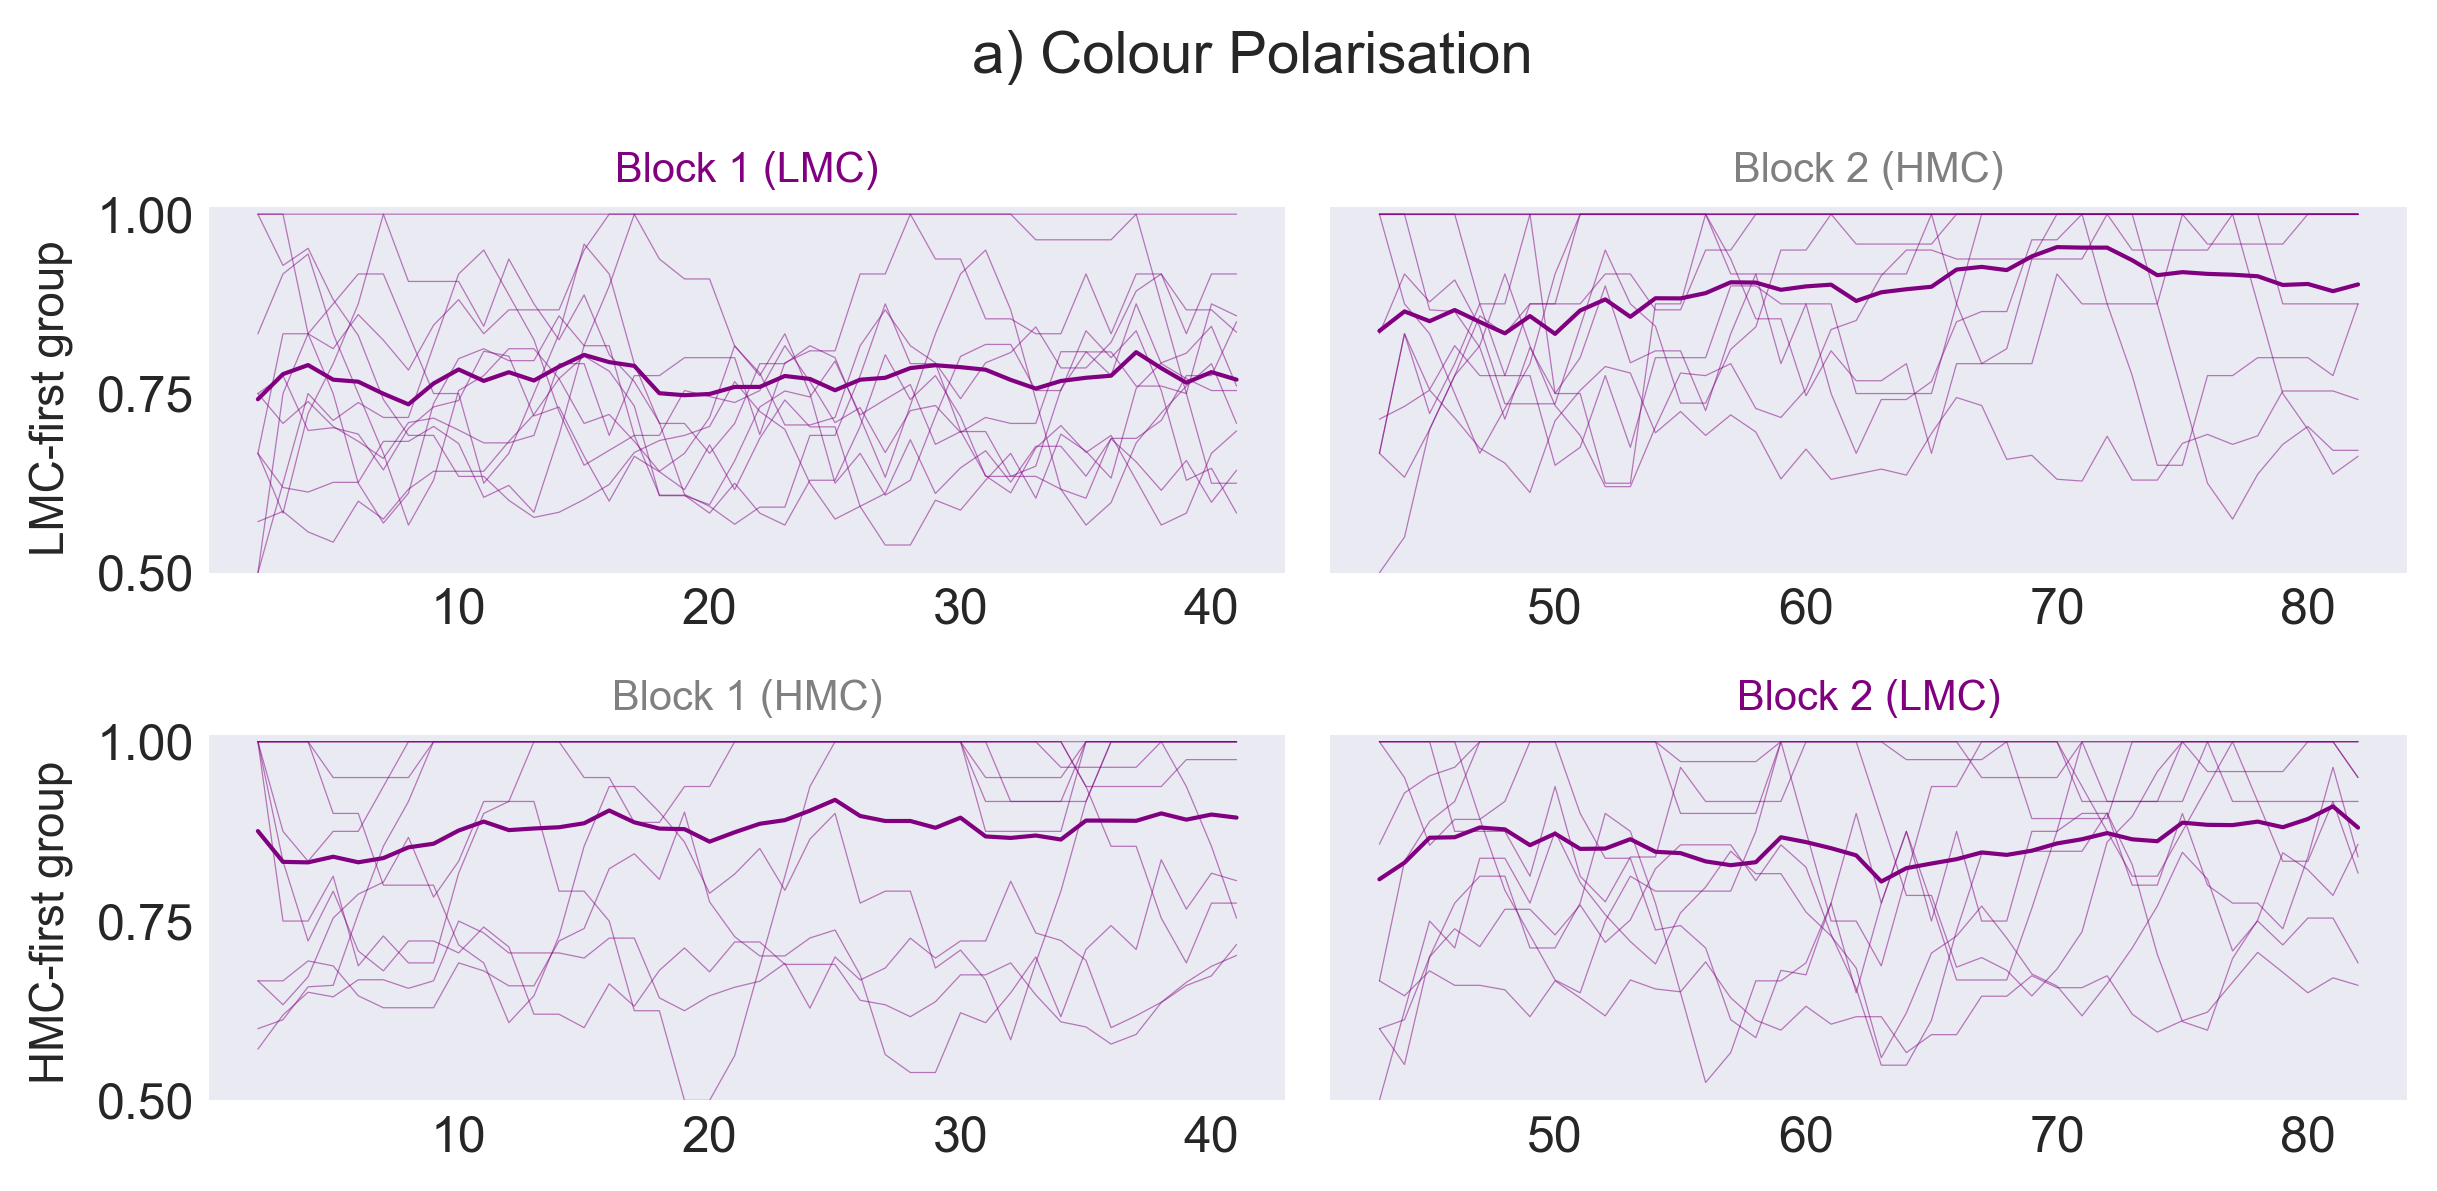

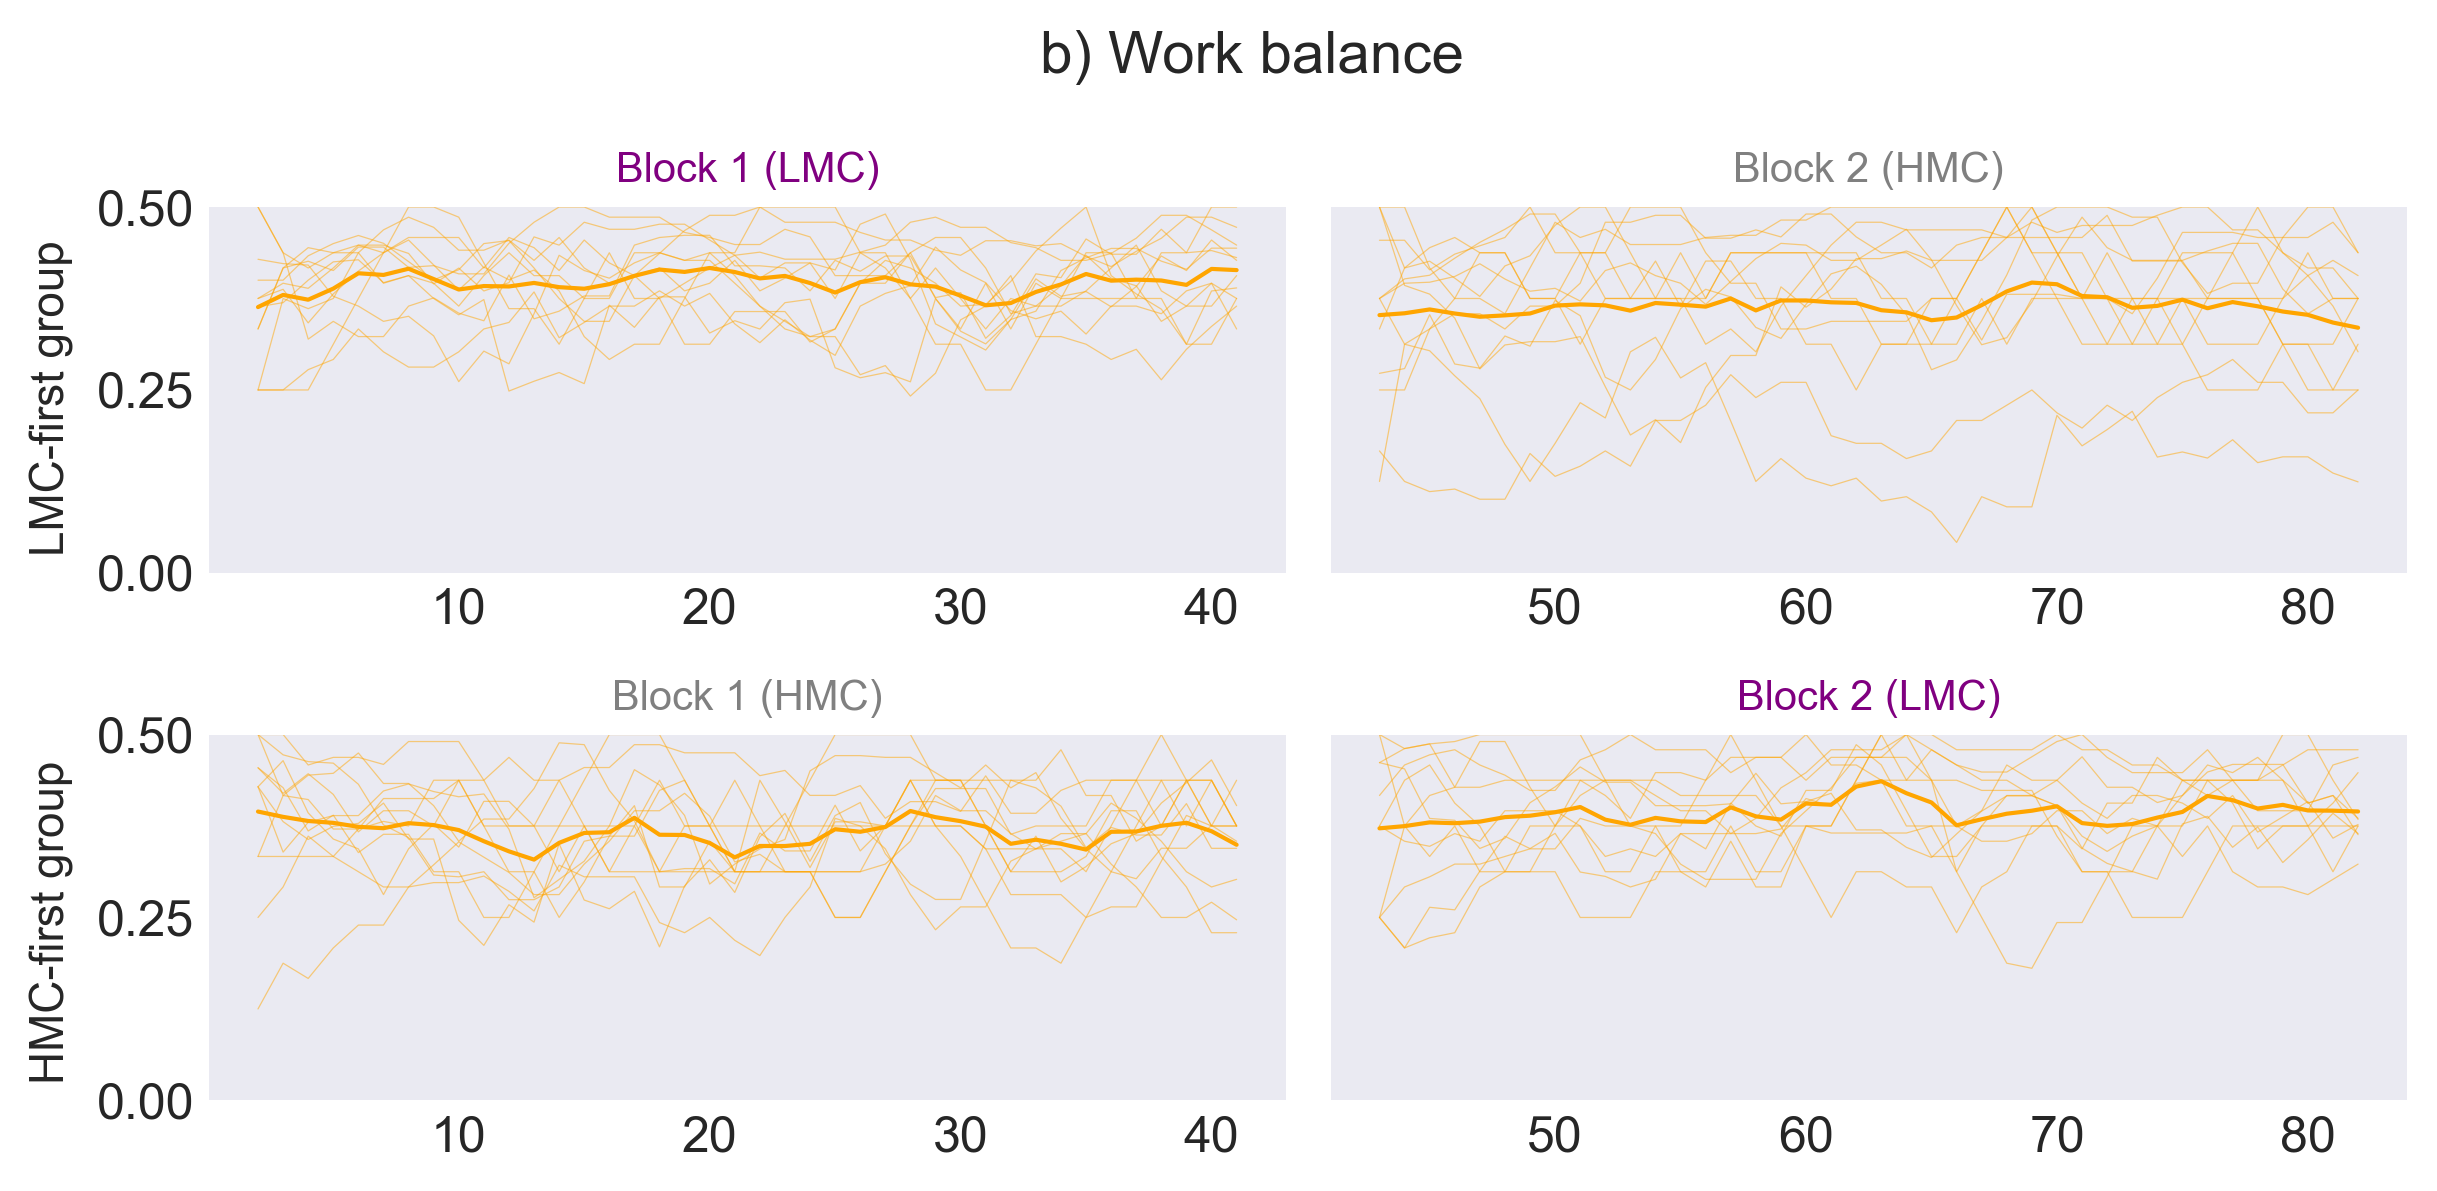

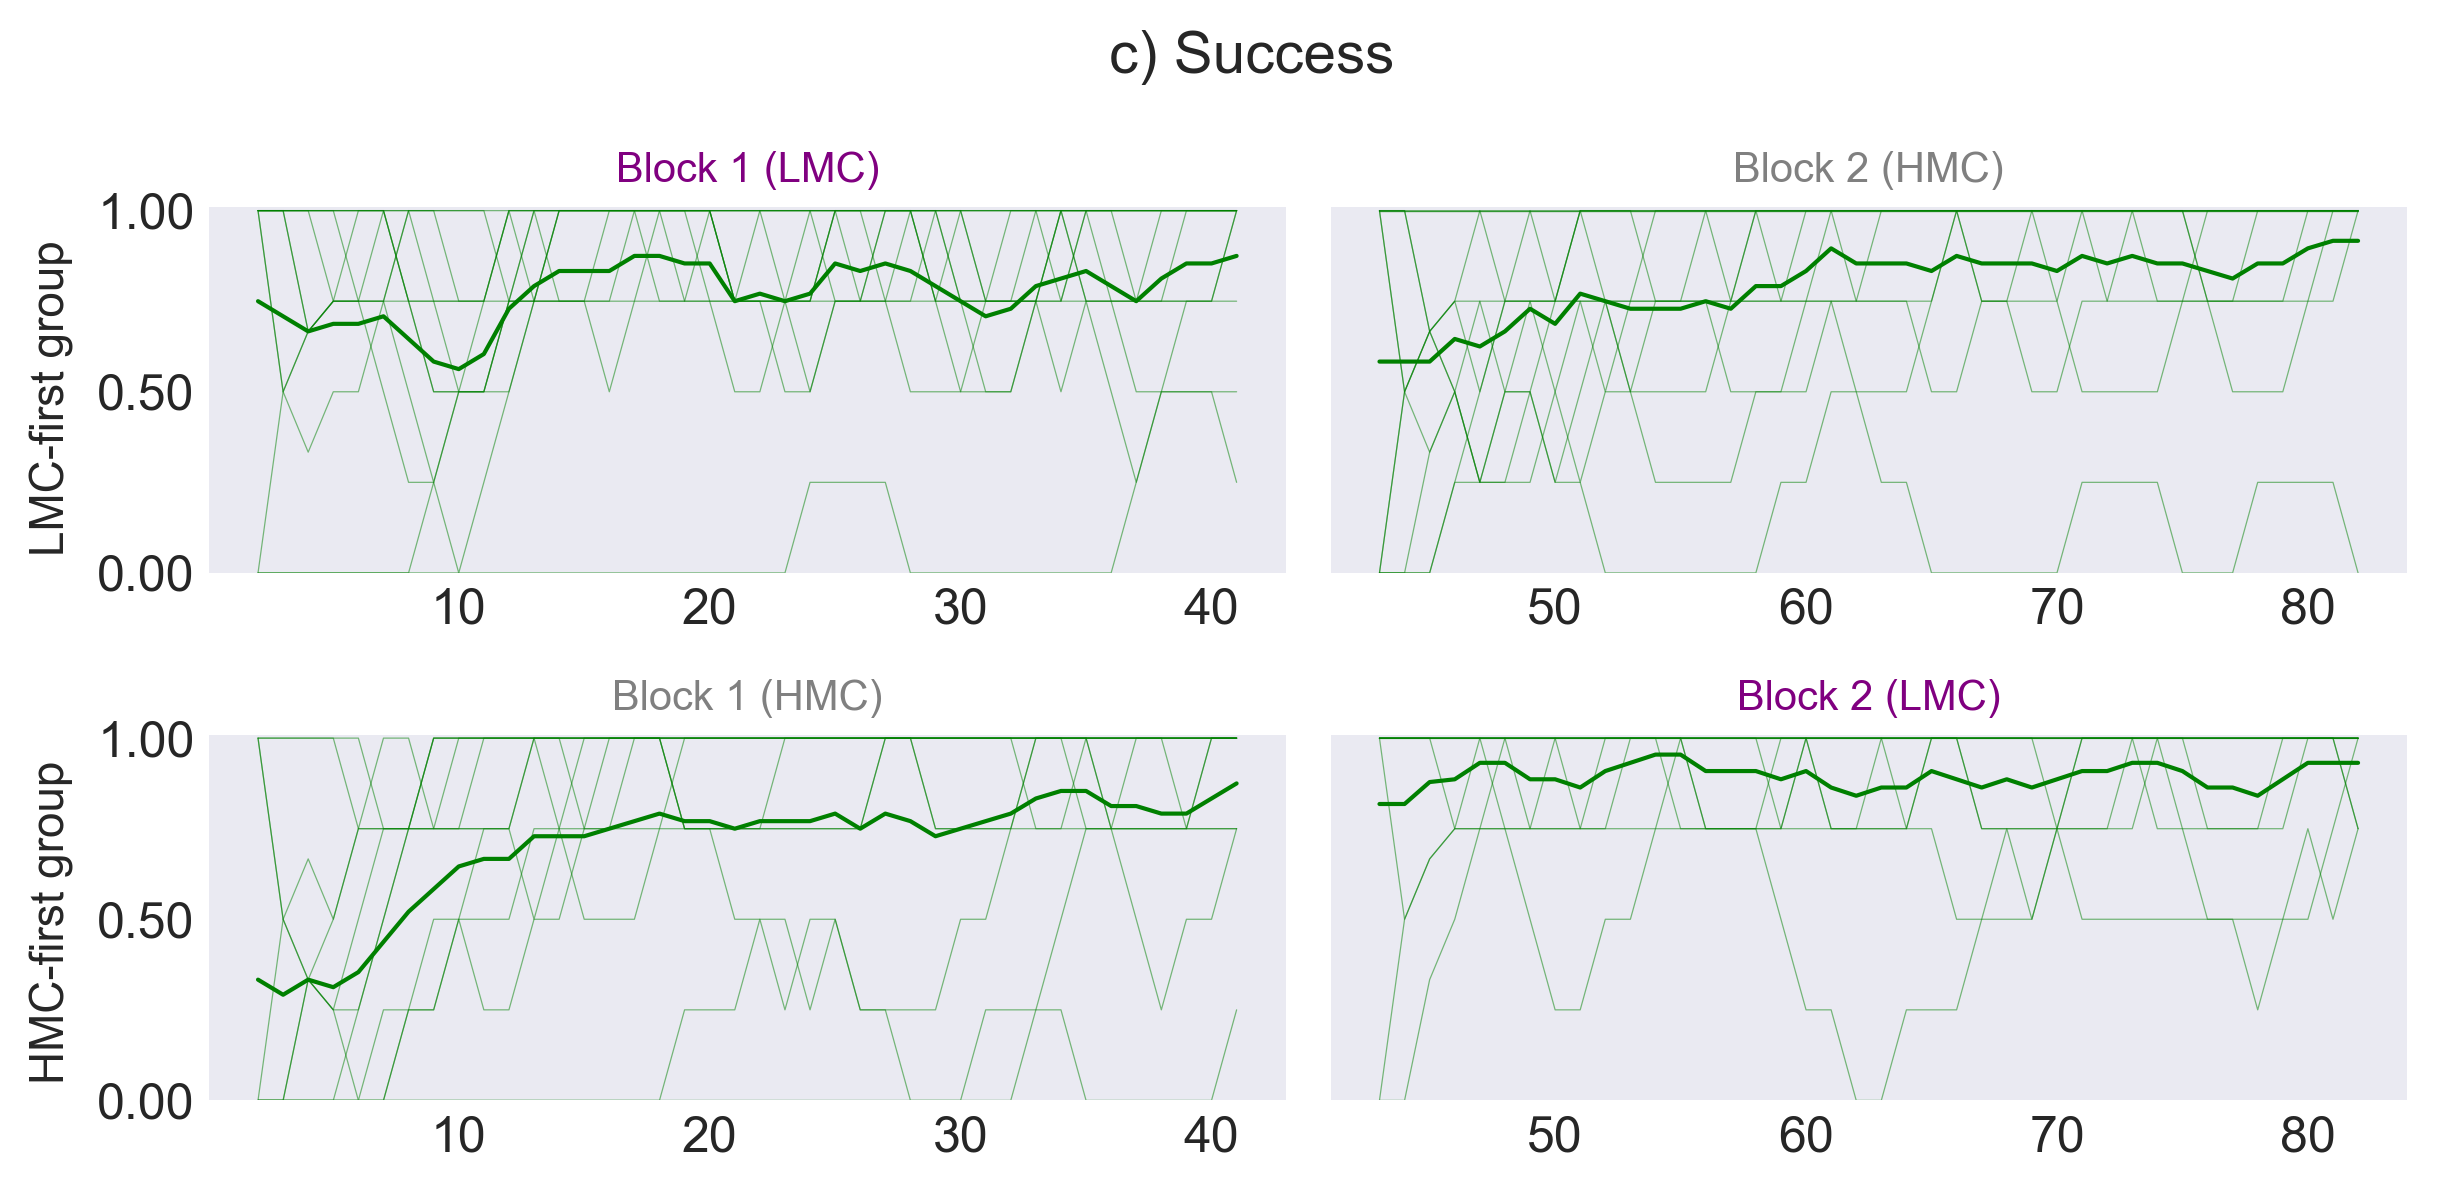

In [5]:
df_trials['log_spatial_cons'] = np.log(df_trials['spatial_cons'])
# dvs = ["goal_color_split", "spatial_cons", "fairness", "successful"]
dvs = ["goal_color_split", "fairness", "successful"]
letters = "abc"
for i, dv in enumerate(dvs):
    ylim = {
        "goal_color_split": (0.5, 1.01),
        "fairness": (0, 0.50),
        "successful": (0.0, 1.01)
    }[dv]
    yticks = {
        "goal_color_split": (0.5, 0.75, 1.0),
        "fairness": (0, 0.25, 0.50),
        "successful": (0.0, 0.5, 1.0)        
    }[dv]
    plots.single_timeseries_with_traces(df_trials, dv=dv,
                           rolling_window_k=4, do_scale=False, figsize=(8, 4),
                           fix_ylims=ylim, yticks=yticks,
                            save="./out/timeseries_single_%s.png" % dv,
                            figlabel=letters[i])
